### The proportion of the spherical shell's volume to the sphere's 
### N维球壳的体积占球体体积的比
---

一个N维球体的体积可以通过以下公式计算  
$$
V_{sphere}=\frac{R^N\pi^{N/2}}{\Gamma(N/2+1)}
$$
其中，$R$是N维球体的半径，$\Gamma$是伽马函数。如果我们考虑一个厚度为d的球壳，那么它的体积通过下面的公式计算：  
$$
V_{shell}=V_{sphere}(R)-V_{sphere}(R-d)=\frac{\pi^{N/2}}{\Gamma(N/2+1)}(R^N-(R-d)^N)
$$
所以，一个半径为1的N维躯体，其厚度为d(d<1)的球壳的体积和球体体积之比为：
$$
\rho=\frac{V_{shell}}{V_{sphere}}=1-(1-d)^N
$$

In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib.animation import FuncAnimation

In [2]:
# We define a function to calculate the ratio of the shell's volume to the sphere's volume
def r(d, N):   # d is the thickness of the shell, N is the dimension
    return (1.0-np.power((1.0-d), N)) 

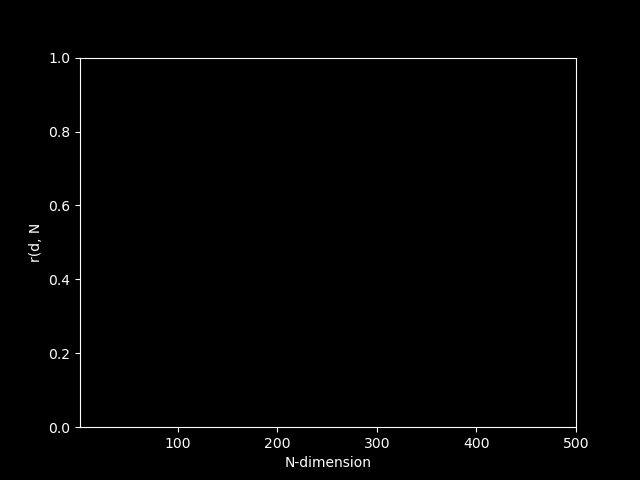

In [4]:
d = 0.005
N_val = np.arange(2, 500)
r_val = r(d, N_val)

plt.style.use('dark_background')
fig, ax = plt.subplots()
ax.set_xlabel("N-dimension")
ax.set_ylabel("r(d, N")
ax.set_xlim(2, 500)
ax.set_ylim(0, 1.0)
line, = ax.plot([],[],linewidth=5)

def init():
    line.set_data([],[])
    return line

def update(frame):
    x = np.arange(frame)
    y = r_val[:frame] 
    line.set_data(x, y)
    return line

ani = FuncAnimation(fig, 
                    update,
                    frames = np.arange(2, 500),
                    init_func = init,
                    interval=50
                   )
plt.show()
    
    

In [5]:
r(0.005, 2)

0.009974999999999956

In [6]:
r(0.005,3)

0.014925124999999984

这个比值随着维度N的增长快速增长。这意味着，在高维空间中，大部分的球体体积都集中在球壳中，这有时一个被称为维度灾难或维度诅咒的例子。这个例子告诉我们
在高维空间处理数据时，这一现象会带来一些挑战。例如在机器学习中，当我们试图在高维空间中插值或者进行近邻搜索时，可能会遇到一些问题，因为在高维空间中，所有的点对于我们来说，都看起来在“边缘”。